# Requirement processing

In [257]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

# Data overlook

In [258]:
df = pd.read_csv("/content/job_data.csv", encoding = 'latin_1')

In [259]:
df

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
...,...,...,...,...,...,...,...,...
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,"
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92K+ *,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,"
3195,Locus Robotics,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62K+ *,"E-commerce,Engineering,Linux,Python,Robotics,S...",",,,,"
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39K+ *,"Computer Science,Data Analytics,Data Mining,Ec...","Career development,Startup environment,,,"


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


# Data cleaning

In [261]:
df.rename(columns={"Job Title":"Title", "Job Type":"Type", "Experience level":"level", 'Requirment of the company ':"Requirment"},inplace=True)

In [262]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True, ignore_index=True)

In [263]:
df.shape

(2600, 8)

In [264]:
df.isnull().sum()

Company       0
Title         0
Location      0
Type          0
level         0
Salary        0
Requirment    0
Facilities    0
dtype: int64

**Requirement cleaning**

In [265]:
nltk.download('stopwords')
nltk.download('punkt')
stopwords.words("english")[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [266]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [267]:
df['Requirment'] = df['Requirment'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

**Facilities cleaning**

In [268]:
df['Facilities'] = df['Facilities'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

**Salary cleaning**

In [269]:
df['Salary'] = df['Salary'].str.extract(r'(\d+)').astype(int)

In [270]:
df['Salary'] = df['Salary'].astype(int)

**Experience cleaning**

In [271]:
def renomer(column, x, y):
    column.replace(x,y, inplace=True)
    return column

In [272]:
renomer(df.level, 'Senior-level', 'Senior' )
renomer(df.level, 'Mid-level', 'Intermediate')
renomer(df.level, 'Entry-level', 'Junior')
renomer(df.level, 'Executive-level', 'Director')

0             Junior
1             Junior
2             Junior
3       Intermediate
4             Senior
            ...     
2595    Intermediate
2596    Intermediate
2597          Senior
2598          Junior
2599          Junior
Name: level, Length: 2600, dtype: object

**Job title cleaning**

In [273]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(row_text, remove_stopwords=True):
    """This function sanitizes a text by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords (optional)
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        row_text (str): the text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """
    # Check if the input is a string or if it's NaN (not a string)
    if not isinstance(row_text, str):
        return row_text

    # remove links
    text = re.sub(r"http\S+", "", row_text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [274]:
df['Title'] = df['Title'].apply(clean_text)

In [275]:
def process_description(description):
    words = description.split()
    filtered_words = [word for word in words if len(word) > 3 and word not in ['bi', 'ai']]
    return ' '.join(filtered_words)

In [276]:
df['Title'] = df['Title'].apply(process_description)

In [277]:
df['Title'] = df['Title'].str.replace('senior ', '').str.strip()

In [278]:
df['Title'] = df['Title'].str.replace('junior ', '').str.strip()

In [279]:
df['Title'] = df['Title'].str.replace('lead ', '').str.strip()

In [280]:
df['Title'] = df['Title'].str.replace('director ', '').str.strip()

In [281]:
df['Title'] = df['Title'].str.replace('staff ', '').str.strip()

In [282]:
df['Title'] = df['Title'].str.replace('engineering', 'engineer').str.strip()
df['Title'] = df['Title'].str.replace('data engineer remote', 'data engineer').str.strip()

In [283]:
df['Title'] = df['Title'].str.replace('remote ', '').str.strip()


**Location cleaning**

In [284]:
!pip install spacy
!python -m spacy download en_core_web_sm

2023-08-01 14:18:51.199795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [285]:
import spacy

# Load the 'en_core_web_sm' model
nlp = spacy.load("en_core_web_sm")

In [286]:
def extract_countries(text):
    doc = nlp(text)
    countries = []
    for ent in doc.ents:
        if ent.label_ == "GPE":  # GPE: Geopolitical Entity (countries, cities, states, etc.)
            countries.append(ent.text)
    return countries

In [287]:
df['Country'] = df['Location'].apply(extract_countries)

In [288]:
def get_last_element(input_list):
    if not input_list:
        return None  # Return None for an empty list
    return input_list[-1]

In [289]:
df['Country'] = df['Country'].apply(get_last_element)

In [290]:
df['Country'].replace('USA', 'United States', inplace=True)

In [291]:
df['Country'].replace('San Francisco', 'United States', inplace=True)
df['Country'].replace('United States - Remote', 'United States', inplace=True)

In [292]:
df['Country'].replace('Bangkok','Thailand', inplace=True)
df['Country'].replace('New York City', 'United States', inplace=True)
df['Country'].replace('US', 'United States', inplace=True)
df['Country'].replace('United Kingdom - Remote', 'United Kingdom', inplace=True)

In [293]:
df['Country'].replace('UK', 'United Kingdom', inplace=True)
df['Country'].replace('California', 'United States', inplace=True)

In [294]:
df['Country'].replace('London', 'United Kingdom', inplace=True)

In [295]:
df['Country'].replace('VA', 'United States', inplace=True)
df['Country'].replace('WA', 'United States', inplace=True)
df['Country'].replace('Chicago', 'United States', inplace=True)

In [296]:
df['Country'].replace('MA', 'United States', inplace=True)

In [297]:
df['Country'].replace('Los Angeles', 'United States', inplace=True)

In [298]:
df['Country'].replace('Pune, India', 'India', inplace=True)

In [299]:
df['Country'].replace('New York', 'United States', inplace=True)

In [300]:
df['Country'].replace('Paris', 'France', inplace=True)

In [301]:
df['Country'].replace('New York City/Remote', 'United States', inplace=True)

In [302]:
df['Country'].replace('United Kingdom,', 'United Kingdom', inplace=True)

In [303]:
df['Country'].replace('Tallinn', 'Estonia', inplace=True)

In [304]:
df['Country'].replace('Brussels', 'Belgium', inplace=True)

In [305]:
df['Country'].replace('Oldsmar', 'United States', inplace=True)

In [306]:
df['Country'].replace('Ontario', 'Canada', inplace=True)

In [307]:
df['Country'].replace('Menlo Park', 'United States', inplace=True)

In [308]:
df['Country'].replace('Newark', 'United States', inplace=True)

In [309]:
df['Country'].replace('Utah', 'United States', inplace=True)

In [310]:
df['Country'].replace('Redmond', 'United States', inplace=True)

In [311]:
df['Country'].replace('Ottawa', 'Canada', inplace=True)

In [312]:
df['Country'].replace('Pune', 'India', inplace=True)
df['Country'].replace('Bengaluru', 'India', inplace=True)

In [313]:
df['Country'].replace('Palo Alto', 'United States', inplace=True)

In [314]:
# Define a dictionary for replacements
replacements = {
    'Foster City': 'United States',
    'Sound Beach': 'United States',
    'Washington': 'United States',
    'San ?': 'United States',
    'Austin': 'United States',
    'Ho Chi Minh City' : 'Vietnam',
    'Madrid': 'Spain',
    'Virginia': 'United States',
    'Santa Clara': 'United States',
    'Reno': 'United States',
    'Dublin' : 'Ireland',
    'Remote Germany': 'Germany',
    'New York City - Hybrid': 'United States',
    "St. Julian's " : 'Malte',
    'MO' : 'United States',
    'Maharashtra':'India',
    'Ho Chi Minh' : 'Vietnam',
    'DC': 'United States',
    'Berlin' : 'Germany',
    'Calgary' : 'Canada',
    'Toronto' : 'Canada',
    'KS' : 'United States',
    'San Mateo' : 'United States',
    'Nantes' : 'France',
    'Colorado' : 'United States',
    'Hyderabad' : 'India',
    'Texas':'United States',
    'Cambridge' : 'England',
    'Athens': 'Greece',
    'North Macedonia' : 'Balkans',
    'Johannesburg' : 'South Africa',
    'South Africa - Remote' : 'South Africa',
    'Hong Kong' : 'China'
}

In [315]:
replacement = {
    'San Antonio' : 'United States',
    'Melbourne' : 'Australia' ,
    'Los Altos' : 'United States' ,
    'CA' : 'United States',
    'Mountain View' : 'United States'  ,
    'Mexico City' : 'Mexico' ,
    'Stockholm' : 'Sweden',
    'San Diego': 'United States',
    'Puerto Rico' : 'United States' ,
    'Redwood City' : 'United States' ,
    'Remote United States': 'United States',
    'Ohio': 'United States',
    'South San Francisco': 'United States',
    'Tel Aviv': 'Palestine',
    'Pune, Bengaluru': 'India',
    'Bellevue': 'Swiss',
    'New York /': 'United States',
    'Karnataka' : 'India',
    'Phoenix' : 'United States',
    'Atlanta' : 'United States',
    'Pune, Maharashtra, India' : 'India',
    'New York City OR' : 'United States',
    'Lisbon' : 'Portugal',
    'Denver' : 'United States',
    'Los' : 'United States',
    'Missouri' : 'United States',
    'United Kingdom - London' : 'United Kingdom',
    'Seattle' : 'United States',
    'Rio de Janeiro' : 'Brazil',
    'Ann Arbor' : 'United States',
    'U.S.' : 'United States',
    'Massachusetts': 'United States',
    'Dallas' : 'United States',
    'Tokyo' : 'Japan',
    'Ahmedabad' : 'India',
    'Warsaw' : 'Poland',
    'Remote Poland' : 'Poland',
    'PA' : 'United States',
    'Belgrade' : 'Serbia',
    'Guadalajara' : 'India',
   'New Delhi' : 'India',
   'Pune, Maharashtra' : 'India',
   'Nebraska' : 'United States',
   'Boston' : 'United States',
   'Almeria' : 'Spain',
   'NZ' : 'United States',
   'MS' : 'United States',
  'Montreal' : 'Canada',
  'Illinois' : 'United States',
  'San Vendemiano' : 'Italy',
  'Barcelona' : 'Spain',
  'Stuttgart' : 'Germany',
  'GB' : 'United States',
  'Pennsylvania': 'United States',
  'Munich' : 'Germany',
  'Hamburg' : 'Germany',
  'KE' : 'United States',
  'Rio de' : 'Brazil',
  'Amsterdam' : 'Netherlands',
  'Tampa' : 'United States',
  'Zurich' : 'Swiss',
  'Sao Paulo' : 'United States',
  'MD' : 'United States',
  'Kansas' : 'United States',
  'Georgia' : 'United States',
  'Tallinn' : 'Estonia',
  'New York City/Remote' : 'United States',
  'Tel-Aviv' : 'Palestine',
  'United Kingdom,' : 'United Kingdom',
  'Israel' : 'Palestine',
  'JPN': 'Japan'
}

In [316]:
df['Country'] = df['Country'].replace(replacements)

In [317]:
df['Country'] = df['Country'].replace(replacement)

In [318]:
df['Country'].value_counts().head(30)

United States     886
India             212
United Kingdom    206
France            107
Germany           100
Canada             97
Australia          46
Poland             41
Brazil             38
Spain              37
Thailand           36
Portugal           34
Mexico             28
South Africa       26
Netherlands        23
Palestine          23
Malaysia           23
Greece             20
Singapore          19
Vietnam            19
Costa Rica         18
Belgium            17
Sweden             16
Italy              16
England            15
Ireland            15
Philippines        14
South Korea        12
Switzerland        12
Japan              11
Name: Country, dtype: int64

In [319]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True, ignore_index=True)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     2315 non-null   object
 1   Title       2315 non-null   object
 2   Location    2315 non-null   object
 3   Type        2315 non-null   object
 4   level       2315 non-null   object
 5   Salary      2315 non-null   int64 
 6   Requirment  2315 non-null   object
 7   Facilities  2315 non-null   object
 8   Country     2315 non-null   object
dtypes: int64(1), object(8)
memory usage: 162.9+ KB


# Searching for classes

In [321]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['Requirment'])

In [322]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [323]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [324]:
# assign clusters and pca vectors to our dataframe
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [325]:
df

,Company,Title,Location,Type,level,Salary,Requirment,Facilities,Country,cluster,x0,x1
0,SGS,clinical data analyst,"Richardson, TX, United States",Full Time,Junior,48,computer science data quality genetics mathema...,,United States,0,0.093032,0.071434
1,Bosch Group,application developer data analyst,"Nonantola, Italy",Full Time,Junior,48,engineering industrial oracle power bi r r,,Italy,0,0.217672,0.116621
2,Publicis Groupe,data engineer full time public sector,"Arlington, VA, United States",Full Time,Intermediate,108,aws azure computer science consulting dataflow...,flex hours flex vacation parental leave unlimi...,United States,2,-0.179149,-0.198149
3,ServiceNow,data scientist,"Kirkland, Washington, United States",Full Time,Senior,184,computer science deep learning industrial mach...,k matching career development competitive pay ...,United States,1,0.405995,-0.211615
4,Natixis in Portugal,vendor management data quality lead,"Porto, Portugal",Full Time,Junior,39,banking data quality excel security,gear,Portugal,0,0.059897,0.231600
...,...,...,...,...,...,...,...,...,...,...,...,...
2310,CCRi,application integration engineer computer visi...,"Chantilly, Virginia, United States",Full Time,Intermediate,113,agile angular apis architecture aws azure,k matching career development flex hours flex ...,United States,2,-0.244297,-0.304274
2311,Publicis Groupe,associate data science,"New York City, United States",Full Time,Intermediate,106,bayesian classification clustering data analys...,career development health care,United States,1,0.243486,0.008272
2312,DoorDash,software engineer machine learning intelligence,"Sunnyvale, CA; San Francisco, CA; New York",Full Time,Senior,176,computer science data analysis engineering exc...,k matching career development equity insurance...,United States,0,0.134405,0.066488
2313,Western Digital,data scientist college graduate,"Biñan, Philippines",Full Time,Junior,39,apis clustering computer science data visualiz...,career development,Philippines,1,0.136699,-0.162053


In [326]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
science,computer,visualization,intelligence,analytics,business,analysis,excel,engineering,data

Cluster 1
models,ml,vision,data,science,computer,engineering,deep,machine,learning

Cluster 2
airflow,apis,science,computer,agile,big,architecture,azure,data,aws


In [327]:
# map clusters to appropriate labels
cluster_map = {0: "Machine Learning and Computer Vision", 1: "Cloud Computing and Data Science", 2: "Data Visualization and Business Analytics"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [328]:
df

,Company,Title,Location,Type,level,Salary,Requirment,Facilities,Country,cluster,x0,x1
0,SGS,clinical data analyst,"Richardson, TX, United States",Full Time,Junior,48,computer science data quality genetics mathema...,,United States,Machine Learning and Computer Vision,0.093032,0.071434
1,Bosch Group,application developer data analyst,"Nonantola, Italy",Full Time,Junior,48,engineering industrial oracle power bi r r,,Italy,Machine Learning and Computer Vision,0.217672,0.116621
2,Publicis Groupe,data engineer full time public sector,"Arlington, VA, United States",Full Time,Intermediate,108,aws azure computer science consulting dataflow...,flex hours flex vacation parental leave unlimi...,United States,Data Visualization and Business Analytics,-0.179149,-0.198149
3,ServiceNow,data scientist,"Kirkland, Washington, United States",Full Time,Senior,184,computer science deep learning industrial mach...,k matching career development competitive pay ...,United States,Cloud Computing and Data Science,0.405995,-0.211615
4,Natixis in Portugal,vendor management data quality lead,"Porto, Portugal",Full Time,Junior,39,banking data quality excel security,gear,Portugal,Machine Learning and Computer Vision,0.059897,0.231600
...,...,...,...,...,...,...,...,...,...,...,...,...
2310,CCRi,application integration engineer computer visi...,"Chantilly, Virginia, United States",Full Time,Intermediate,113,agile angular apis architecture aws azure,k matching career development flex hours flex ...,United States,Data Visualization and Business Analytics,-0.244297,-0.304274
2311,Publicis Groupe,associate data science,"New York City, United States",Full Time,Intermediate,106,bayesian classification clustering data analys...,career development health care,United States,Cloud Computing and Data Science,0.243486,0.008272
2312,DoorDash,software engineer machine learning intelligence,"Sunnyvale, CA; San Francisco, CA; New York",Full Time,Senior,176,computer science data analysis engineering exc...,k matching career development equity insurance...,United States,Machine Learning and Computer Vision,0.134405,0.066488
2313,Western Digital,data scientist college graduate,"Biñan, Philippines",Full Time,Junior,39,apis clustering computer science data visualiz...,career development,Philippines,Cloud Computing and Data Science,0.136699,-0.162053


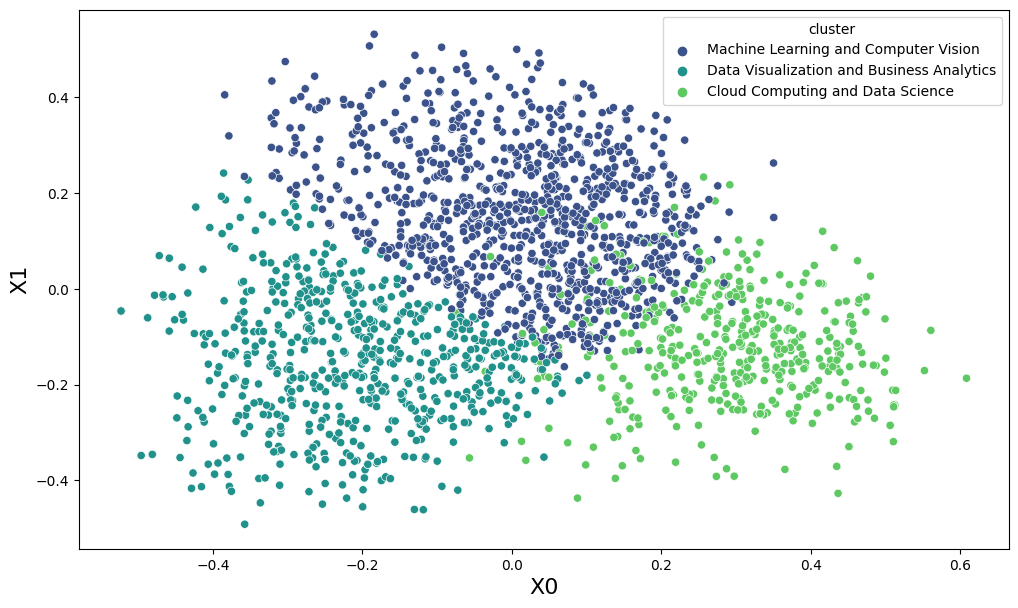

In [329]:
# set image size
plt.figure(figsize=(12, 7))
# set a title", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

# Data processing

In [330]:
df['classe'] = df['cluster']

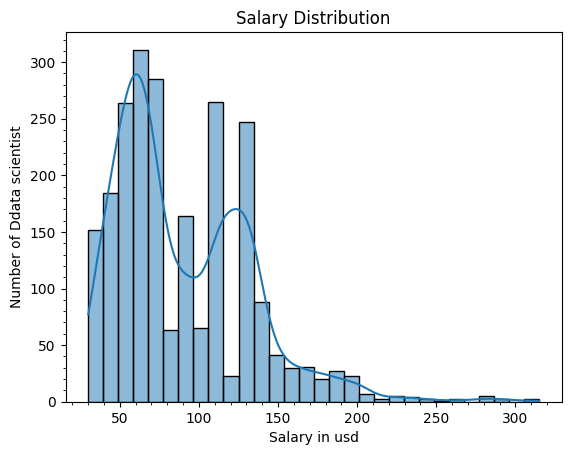

In [331]:
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in usd')
plt.ylabel('Number of Ddata scientist')
plt.minorticks_on()

<Axes: >

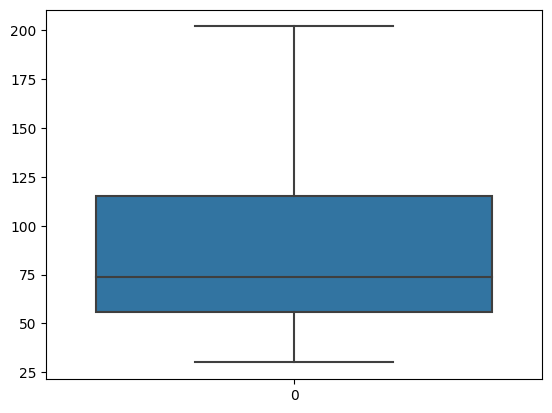

In [332]:
sns.boxplot(df['Salary'], showfliers=False)

In [333]:
import plotly.express as px
px.histogram(df, x='Salary', marginal='rug', title='<b> Salary Distribution')

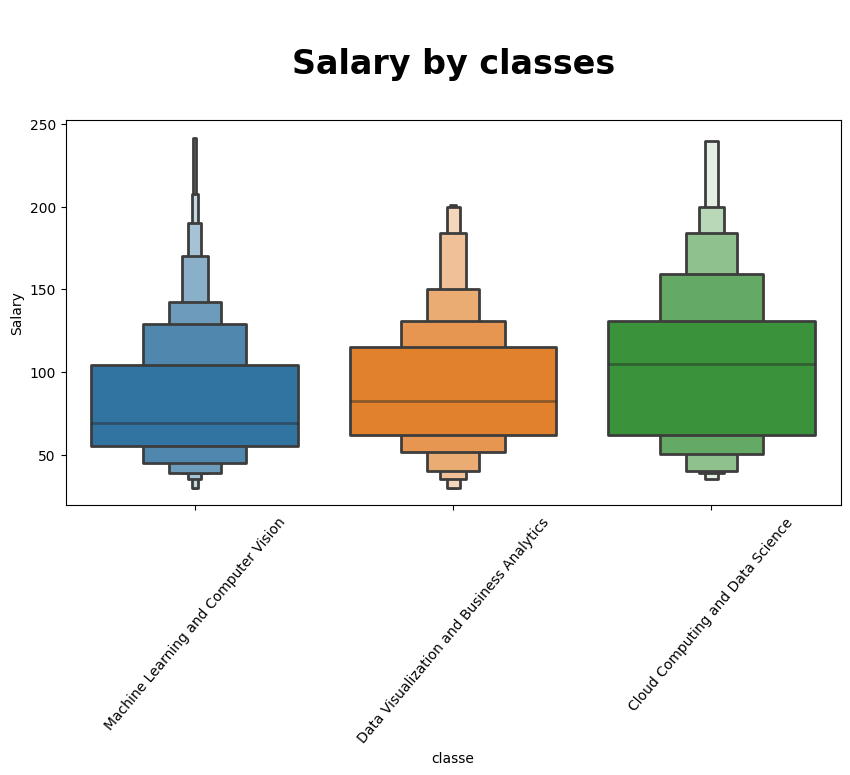

In [334]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, y='Salary', x='classe', showfliers=False, linewidth=2)
plt.title('\nSalary by classes\n', fontsize=24, fontweight='bold')
plt.xticks(rotation=50)
plt.show()

In [335]:
counts = df.level.value_counts()
counts

Senior          1473
Intermediate     398
Junior           333
Director         111
Name: level, dtype: int64

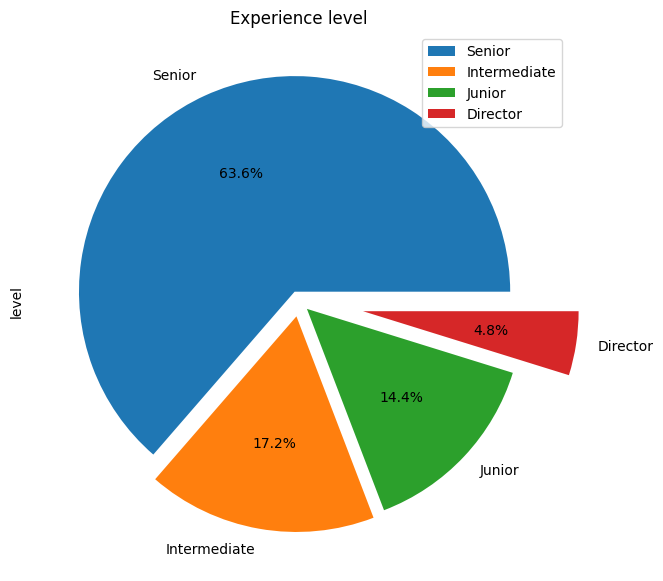

In [336]:
order = ['Junior', 'Mid-level', 'Senior-level', 'Executive-level']
plt.figure(figsize=(10,7))
counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0.07, 0.05, 0.3])
plt.title('Experience level')
plt.legend(counts.index, loc='upper right', fontsize=10)

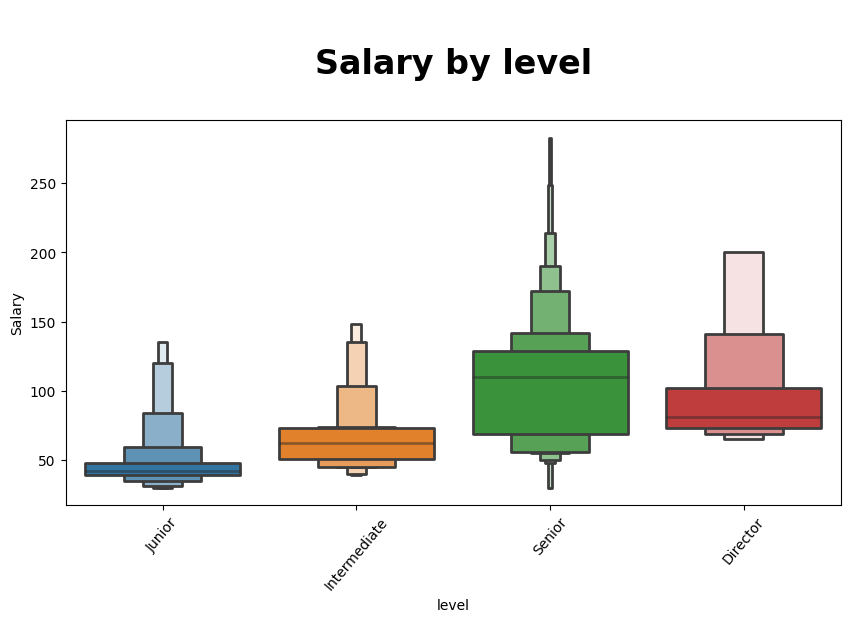

In [337]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, y='Salary', x='level', showfliers=False, linewidth=2)
plt.title('\nSalary by level\n', fontsize=24, fontweight='bold')
plt.xticks(rotation=50)
plt.show()

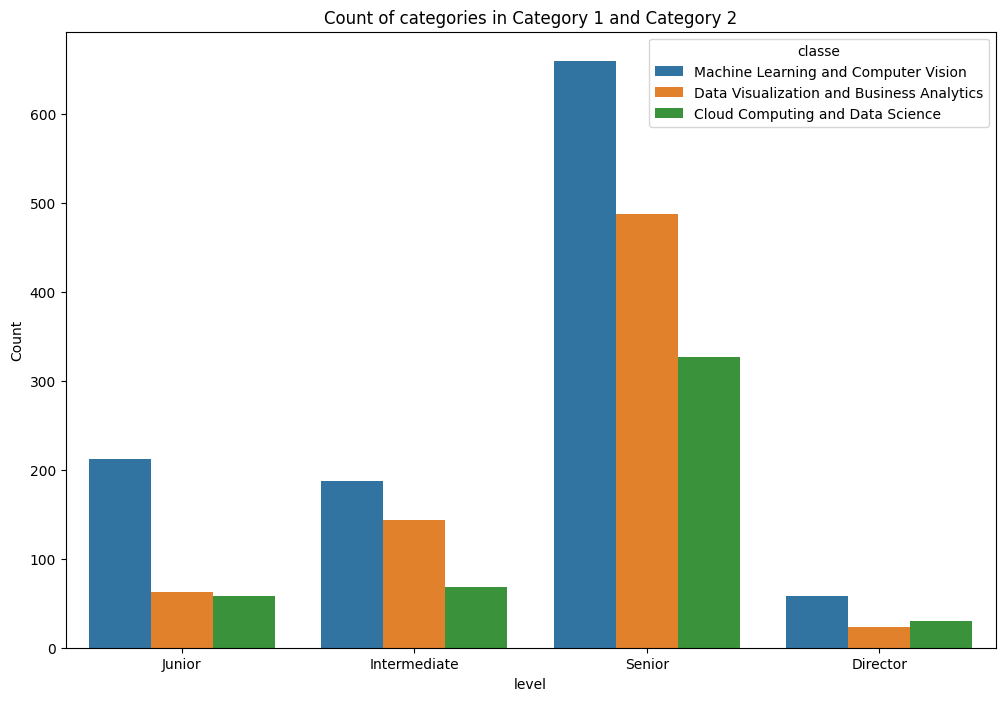

In [338]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Use countplot to visualize the data
sns.countplot(x='level', hue='classe', data=df)

# Set labels and title
plt.xlabel('level')
plt.ylabel('Count')
plt.title('Count of categories in Category 1 and Category 2')

# Show the plot
plt.show()

<Axes: >

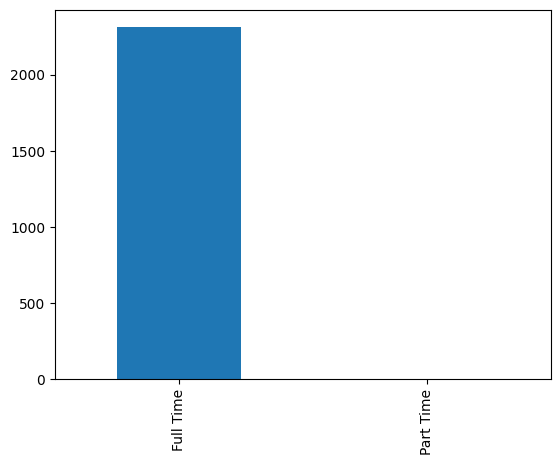

In [339]:
df.Type.value_counts().plot(kind='bar')

In [340]:
df.classe.unique()

array(['Machine Learning and Computer Vision',
       'Data Visualization and Business Analytics',
       'Cloud Computing and Data Science'], dtype=object)

In [341]:
df2 = df[df['classe'] == 'Data Visualization and Business Analytics']

In [342]:
df2['Title'].value_counts().head(10)

data engineer                176
machine learning engineer     31
data scientist                22
data architect                10
manager data engineer          9
data analyst                   9
analytics engineer             7
associate data engineer        5
mlops engineer                 4
engineer                       4
Name: Title, dtype: int64

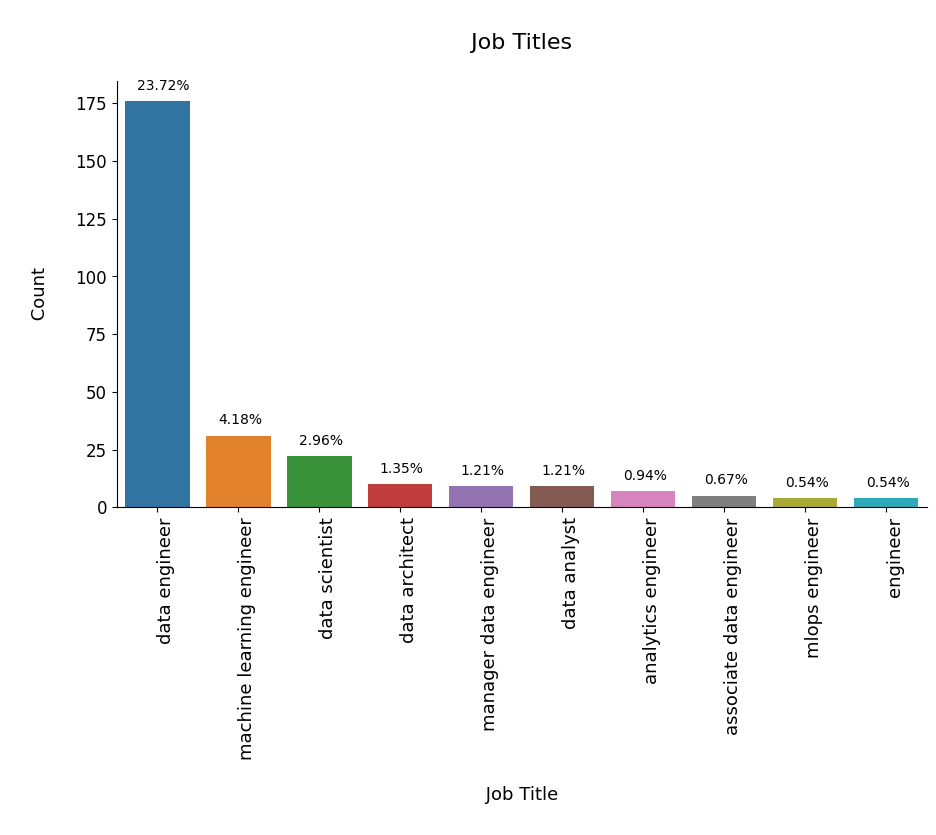

In [343]:
# Looking at the most in demand job titles.
catp = sns.catplot(x="Title",data=df2,order=df2['Title'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = df2['Title'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

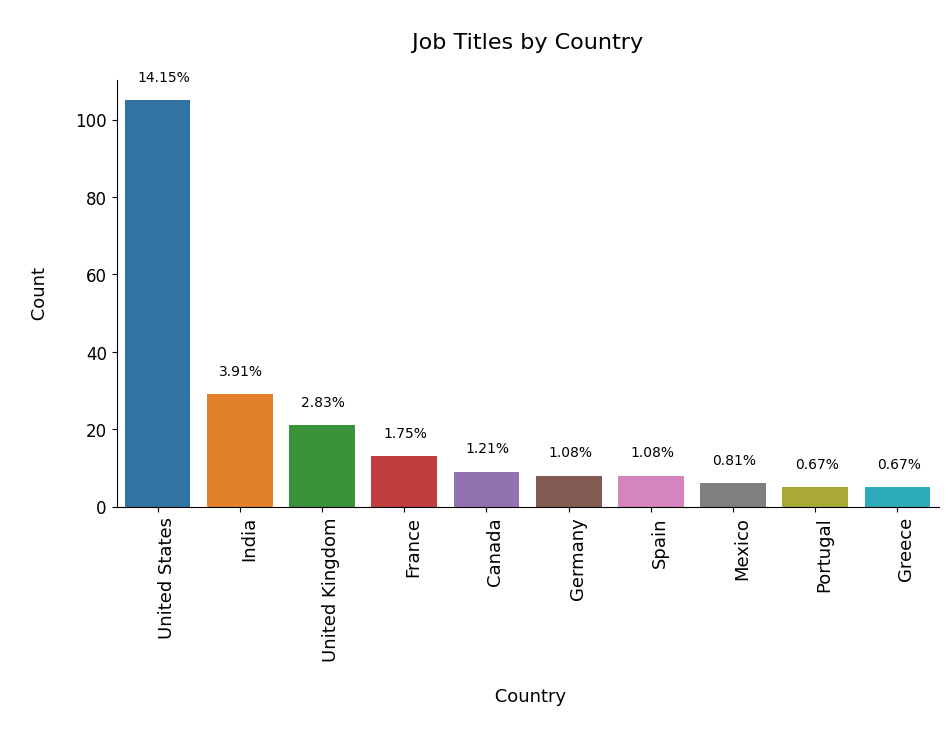

In [344]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Country",data=filtered_df,order=filtered_df['Country'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Country'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by Country \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Country\n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

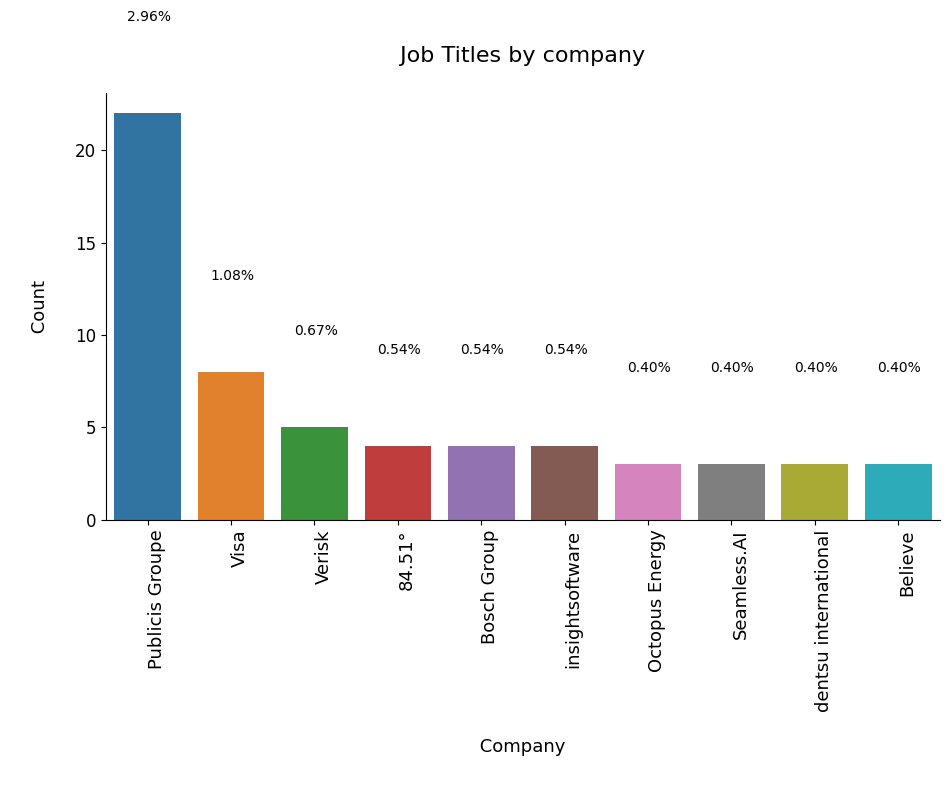

In [345]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Company",data=filtered_df,order=filtered_df['Company'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Company'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by company \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Company \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

In [346]:
df2.columns

Index(['Company', 'Title', 'Location', 'Type', 'level', 'Salary', 'Requirment',
       'Facilities', 'Country', 'cluster', 'x0', 'x1', 'classe'],
      dtype='object')

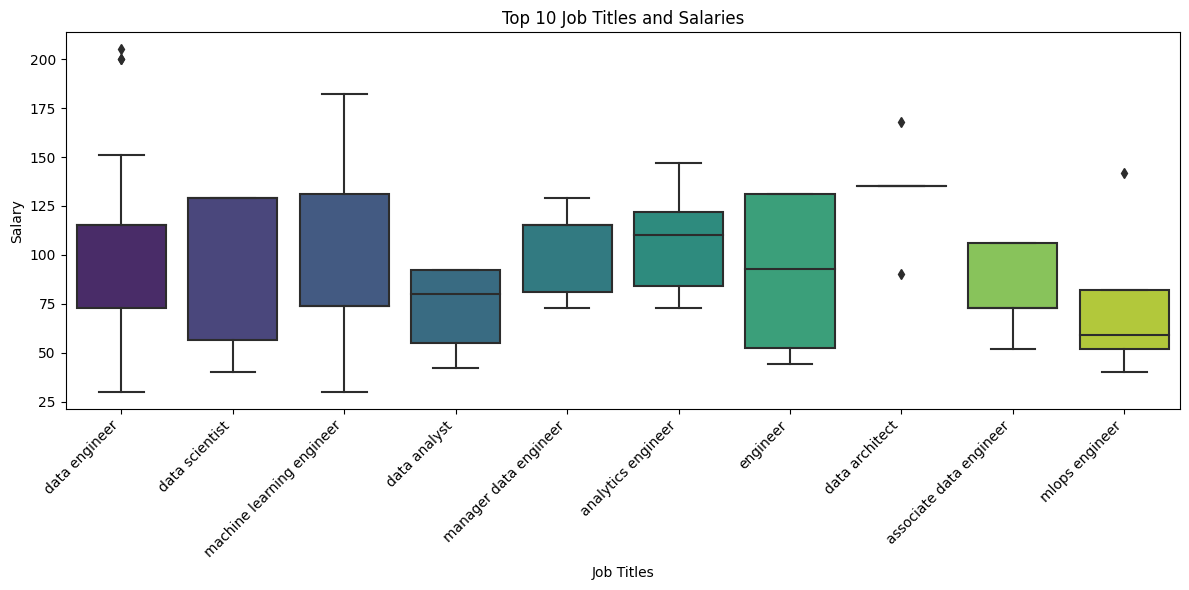

In [347]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Salary', data=filtered_df, palette='viridis')
plt.xlabel('Job Titles')
plt.ylabel('Salary')
plt.title('Top 10 Job Titles and Salaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

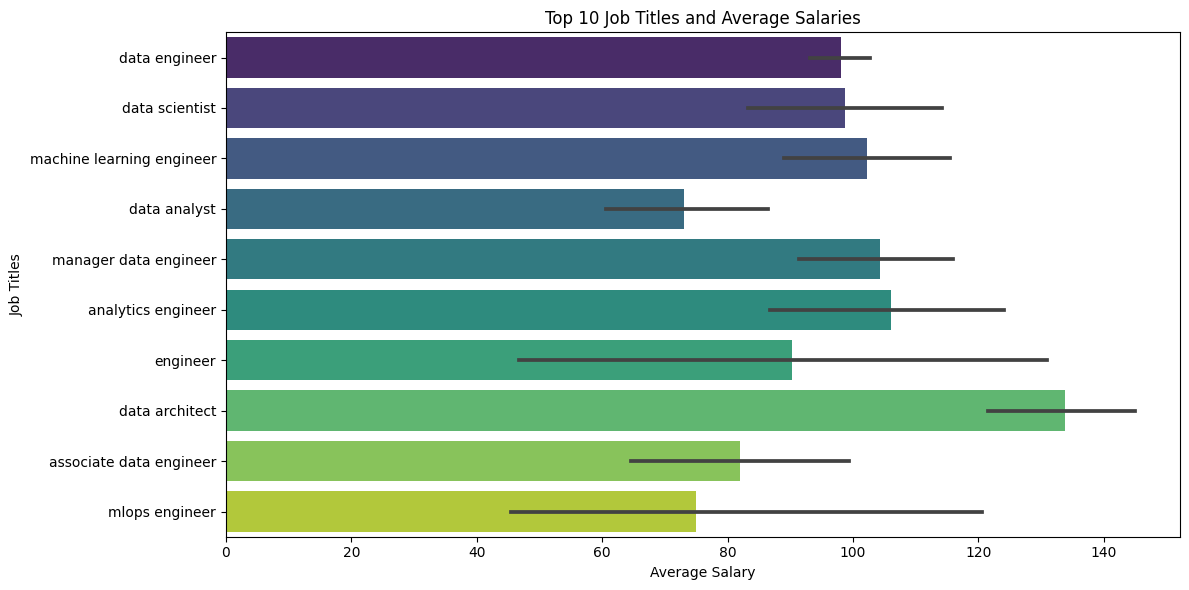

In [348]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Salary', y='Title', data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.show()

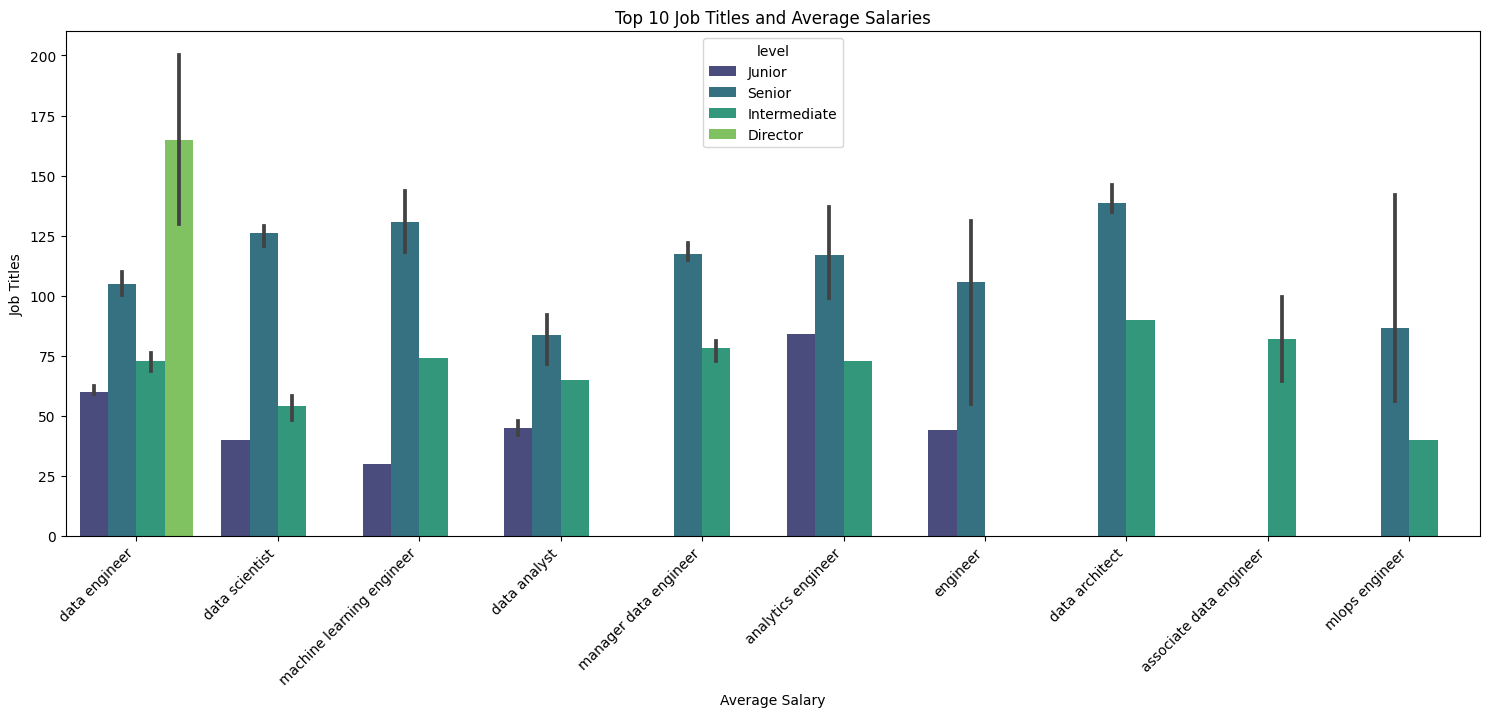

In [349]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Title', y='Salary', hue='level',  data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [350]:
df.columns

Index(['Company', 'Title', 'Location', 'Type', 'level', 'Salary', 'Requirment',
       'Facilities', 'Country', 'cluster', 'x0', 'x1', 'classe'],
      dtype='object')

In [351]:
df3 = df[df['classe'] == 'Cloud Computing and Data Science']

In [352]:
df3['Title'].value_counts().head(10)

data scientist                         54
machine learning engineer              35
research scientist                      8
machine learning scientist              7
engineer                                7
software engineer machine learning      6
applied scientist                       5
data analyst                            5
principal machine learning engineer     5
data engineer                           5
Name: Title, dtype: int64

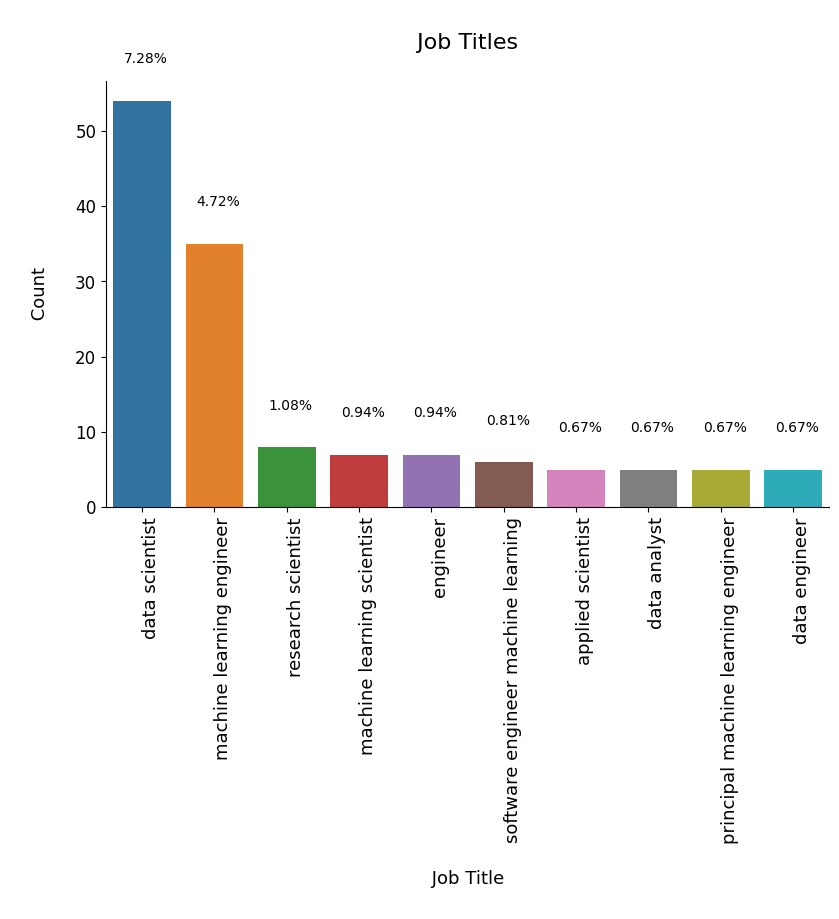

In [353]:
# Looking at the most in demand job titles.
catp = sns.catplot(x="Title",data=df3,order=df3['Title'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = df3['Title'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

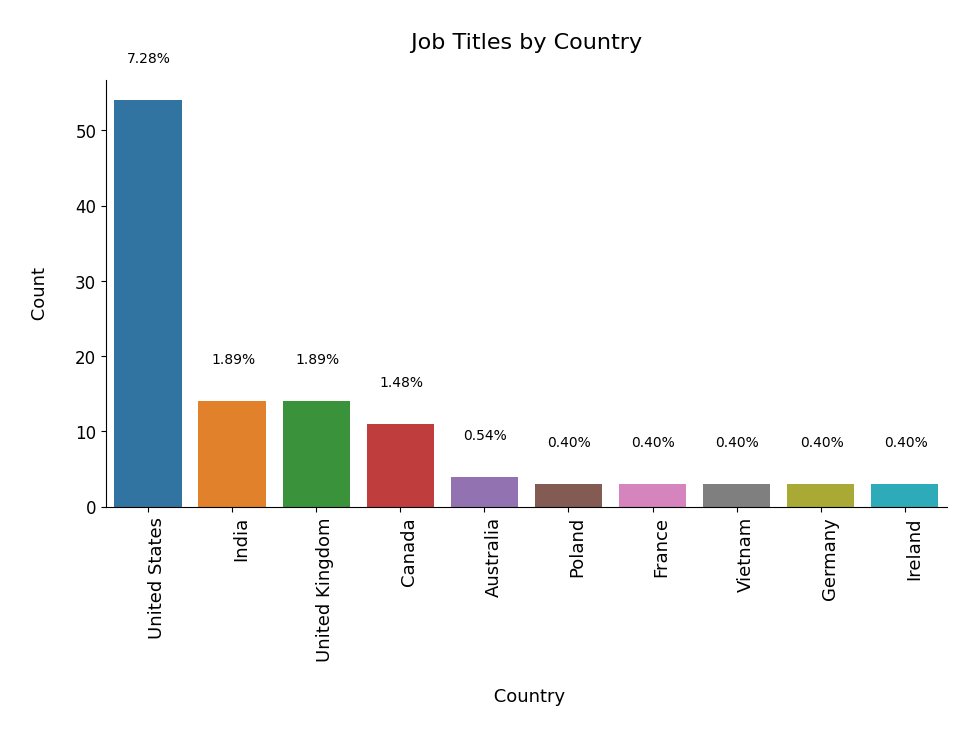

In [354]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Country",data=filtered_df,order=filtered_df['Country'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Country'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by Country \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Country\n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

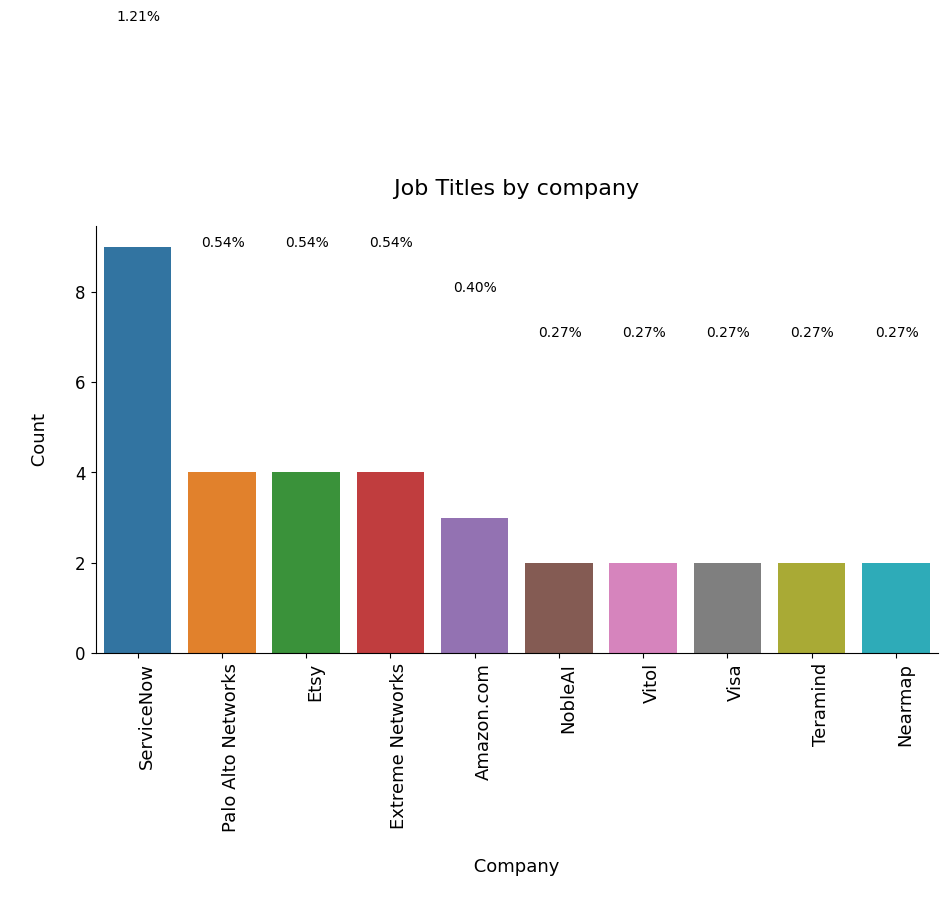

In [355]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Company",data=filtered_df,order=filtered_df['Company'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Company'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by company \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Company \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

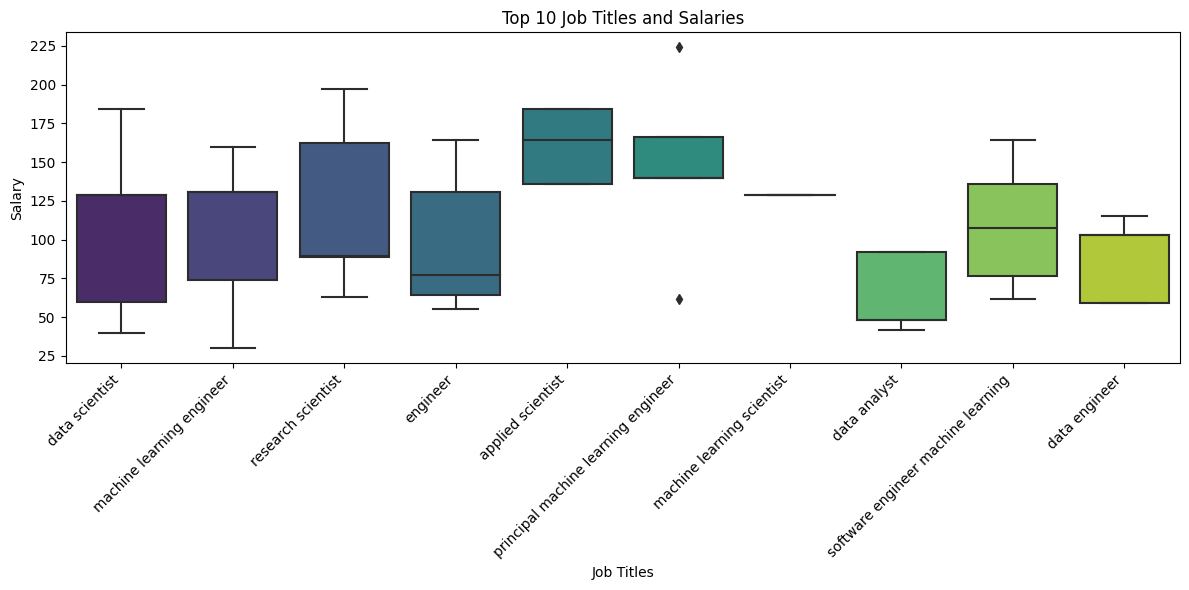

In [356]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Salary', data=filtered_df, palette='viridis')
plt.xlabel('Job Titles')
plt.ylabel('Salary')
plt.title('Top 10 Job Titles and Salaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

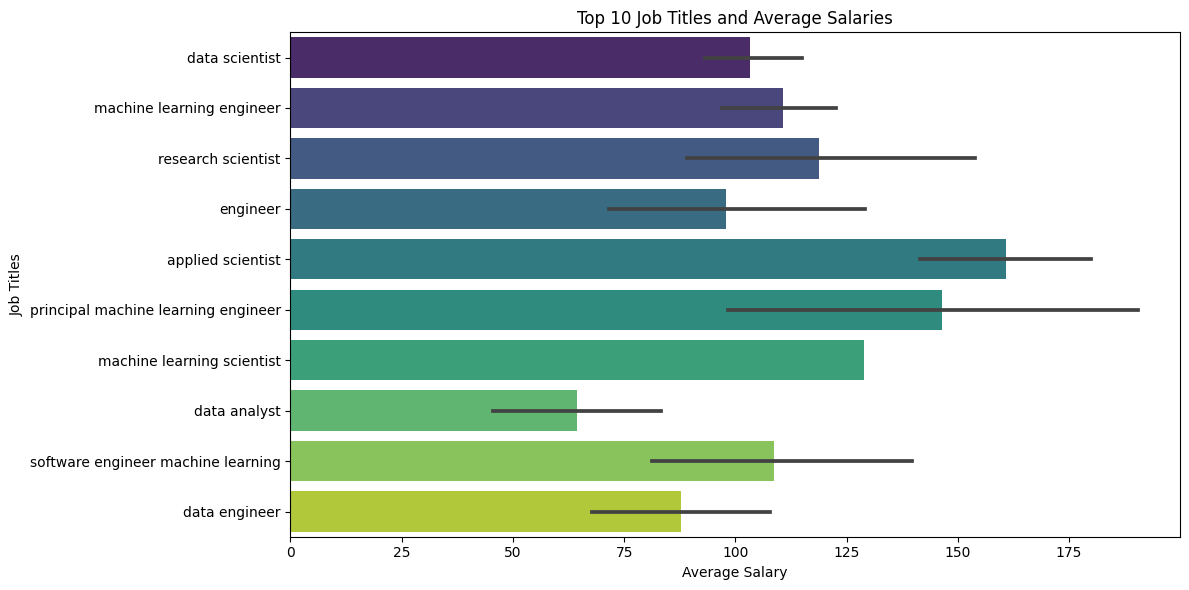

In [357]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Salary', y='Title', data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.show()

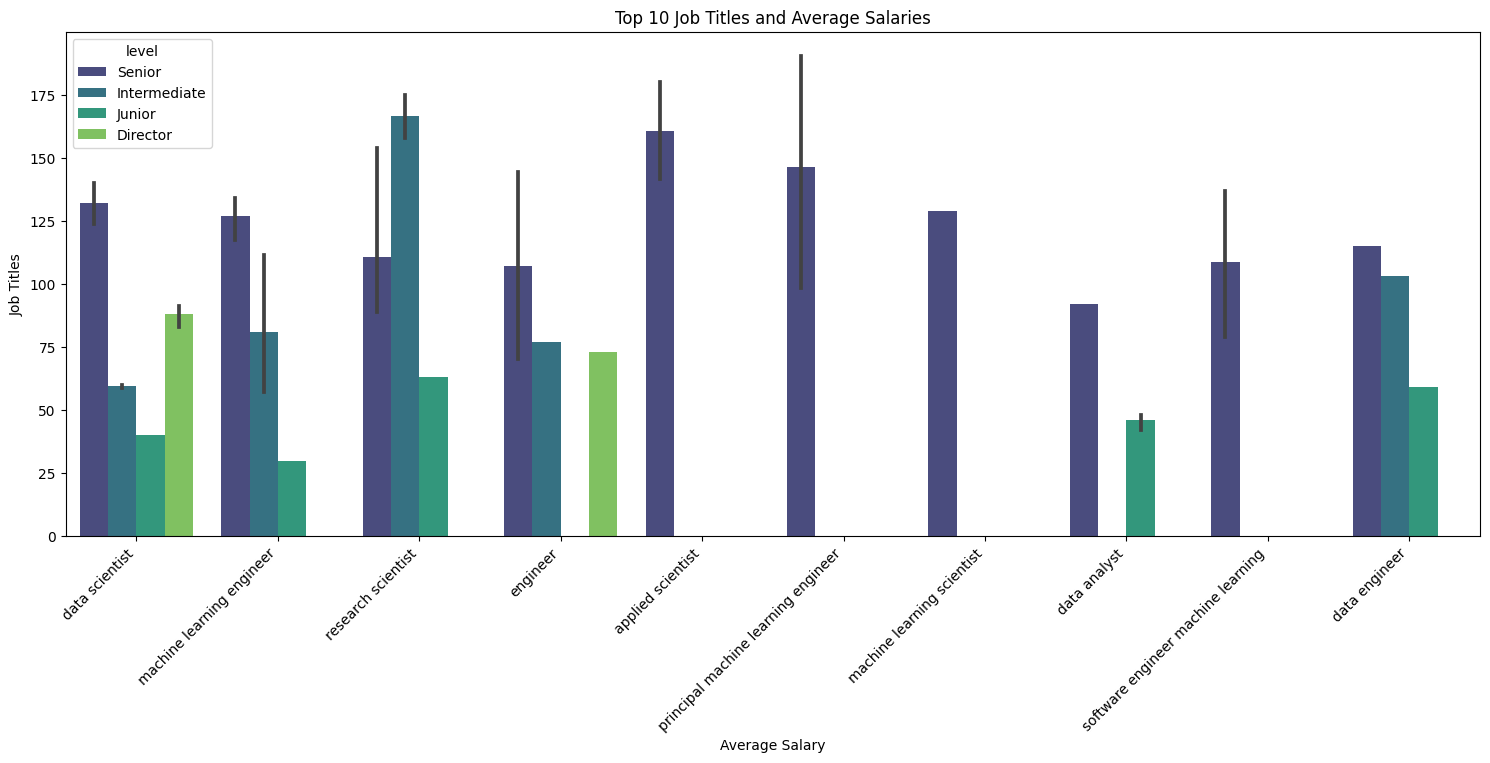

In [358]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Title', y='Salary', hue='level',  data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [359]:
df4 = df[df['classe'] == 'Machine Learning and Computer Vision']

In [360]:
df4['Title'].value_counts().head(10)

data analyst                      112
data scientist                     53
data engineer                      47
business intelligence analyst      17
analytics engineer                 17
data architect                      9
business intelligence engineer      7
analyst                             7
machine learning engineer           7
developer                           6
Name: Title, dtype: int64

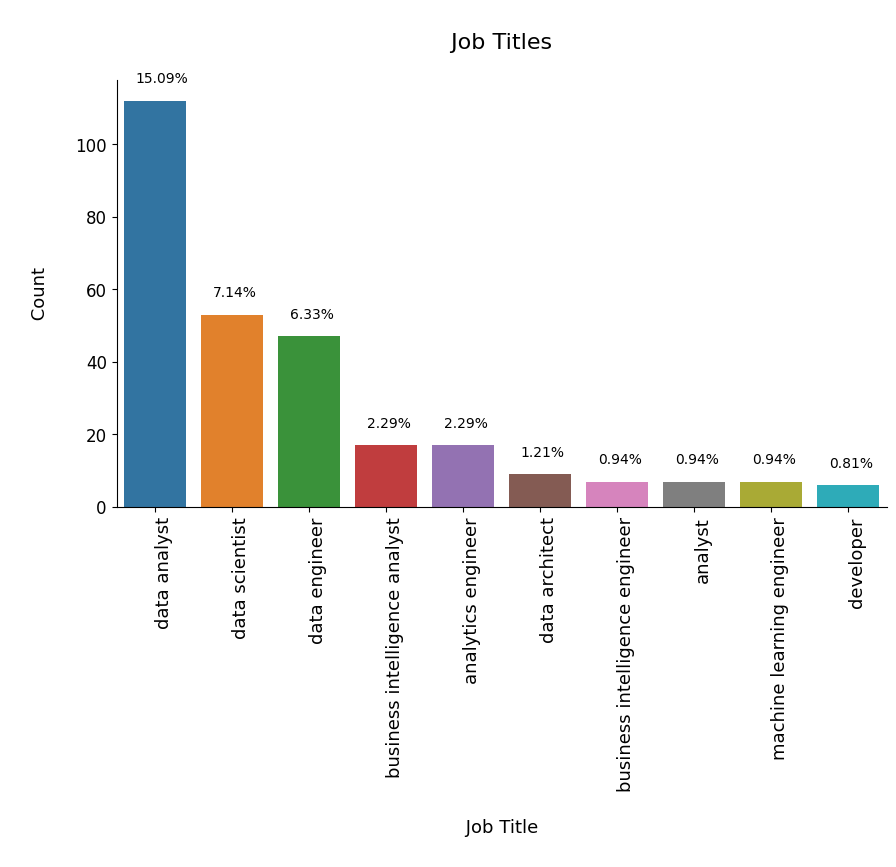

In [361]:
# Looking at the most in demand job titles.
catp = sns.catplot(x="Title",data=df4,order=df4['Title'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = df4['Title'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

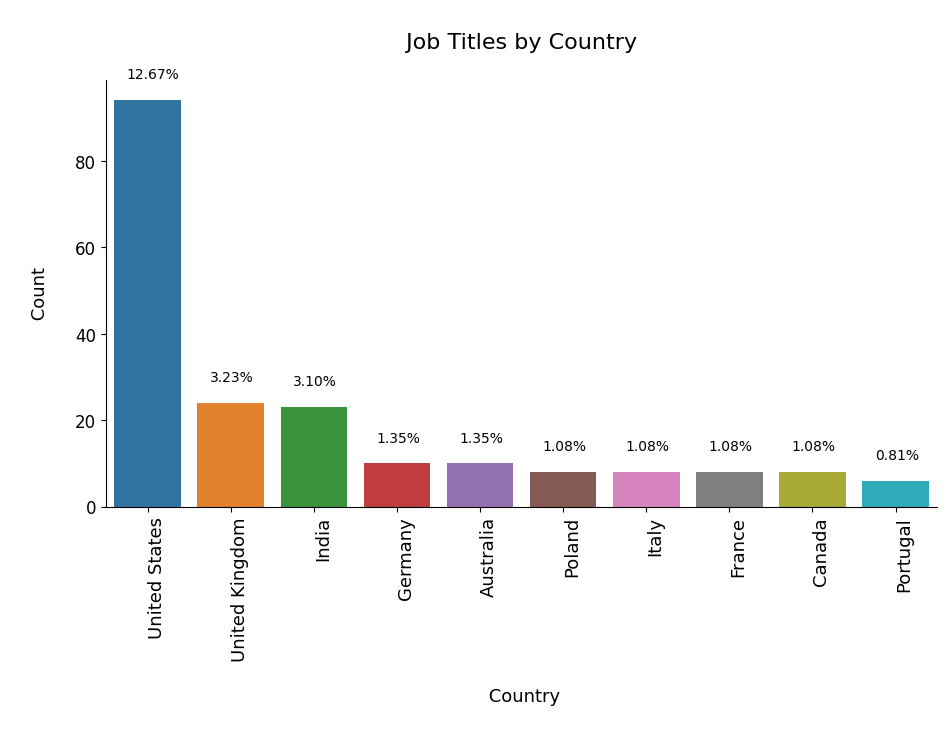

In [362]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Country",data=filtered_df,order=filtered_df['Country'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Country'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by Country \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Country\n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

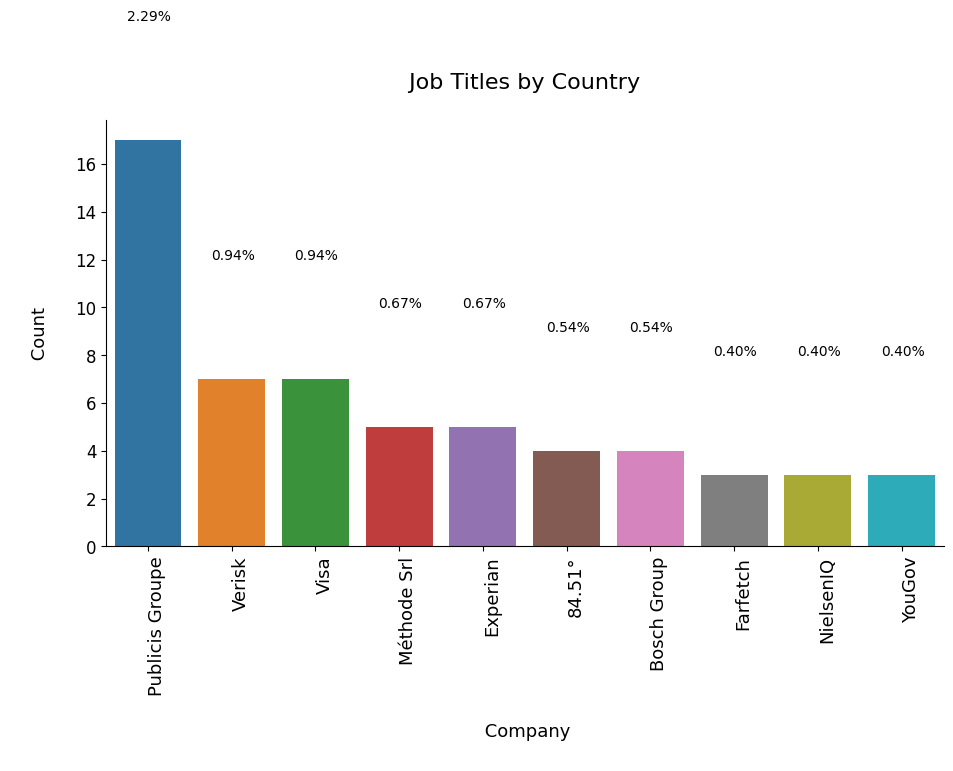

In [363]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Company",data=filtered_df,order=filtered_df['Company'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Company'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by Country \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Company\n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

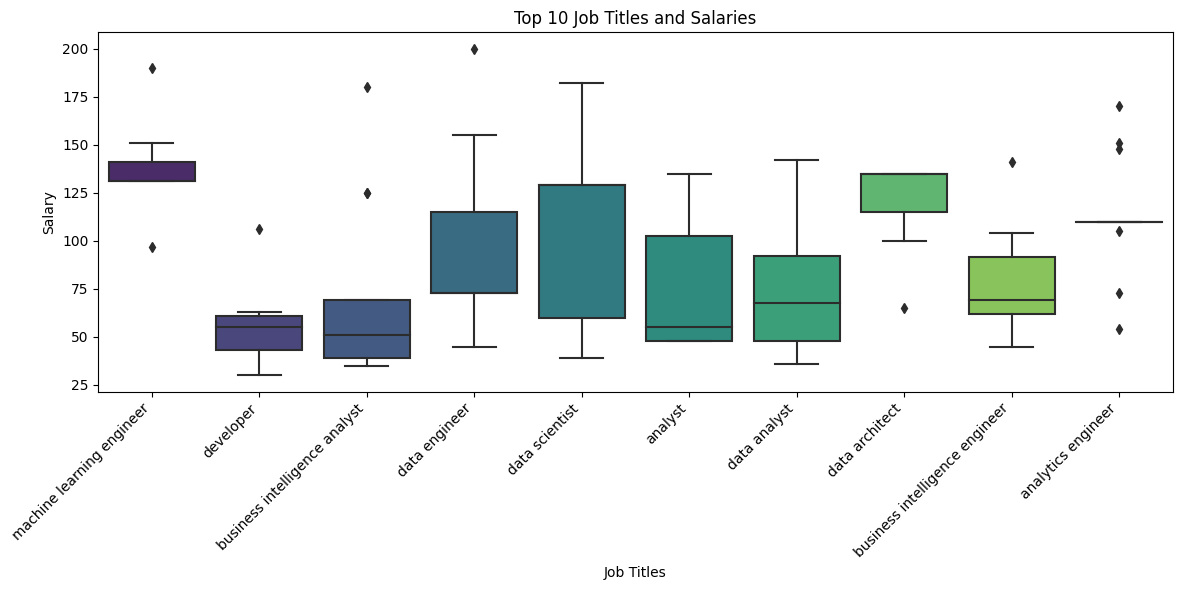

In [364]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Salary', data=filtered_df, palette='viridis')
plt.xlabel('Job Titles')
plt.ylabel('Salary')
plt.title('Top 10 Job Titles and Salaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

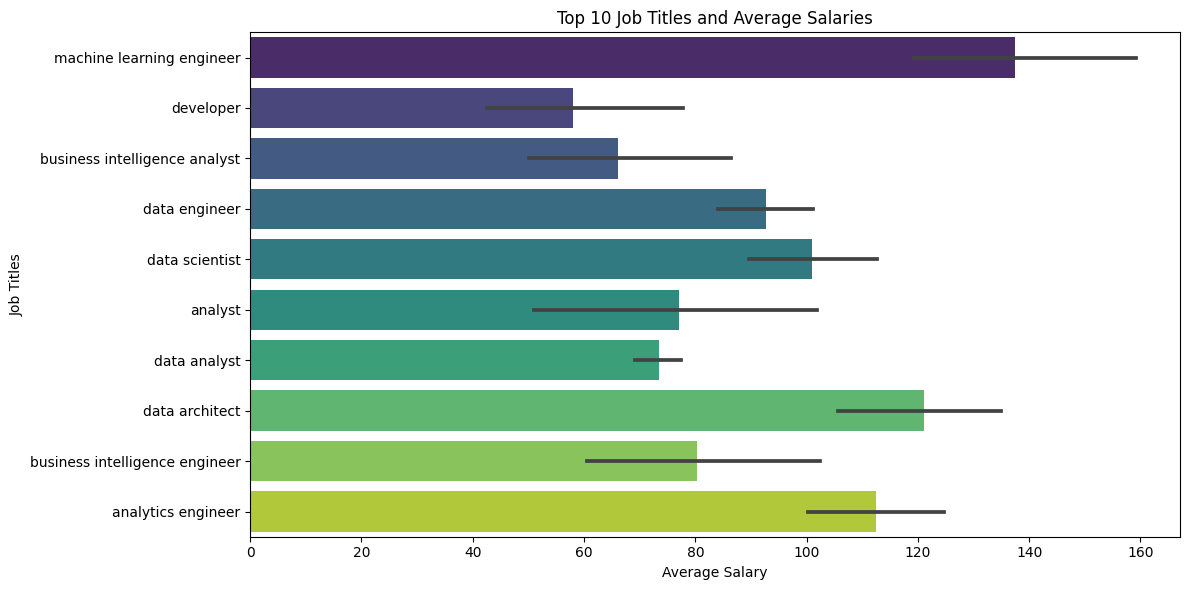

In [365]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Salary', y='Title', data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.show()

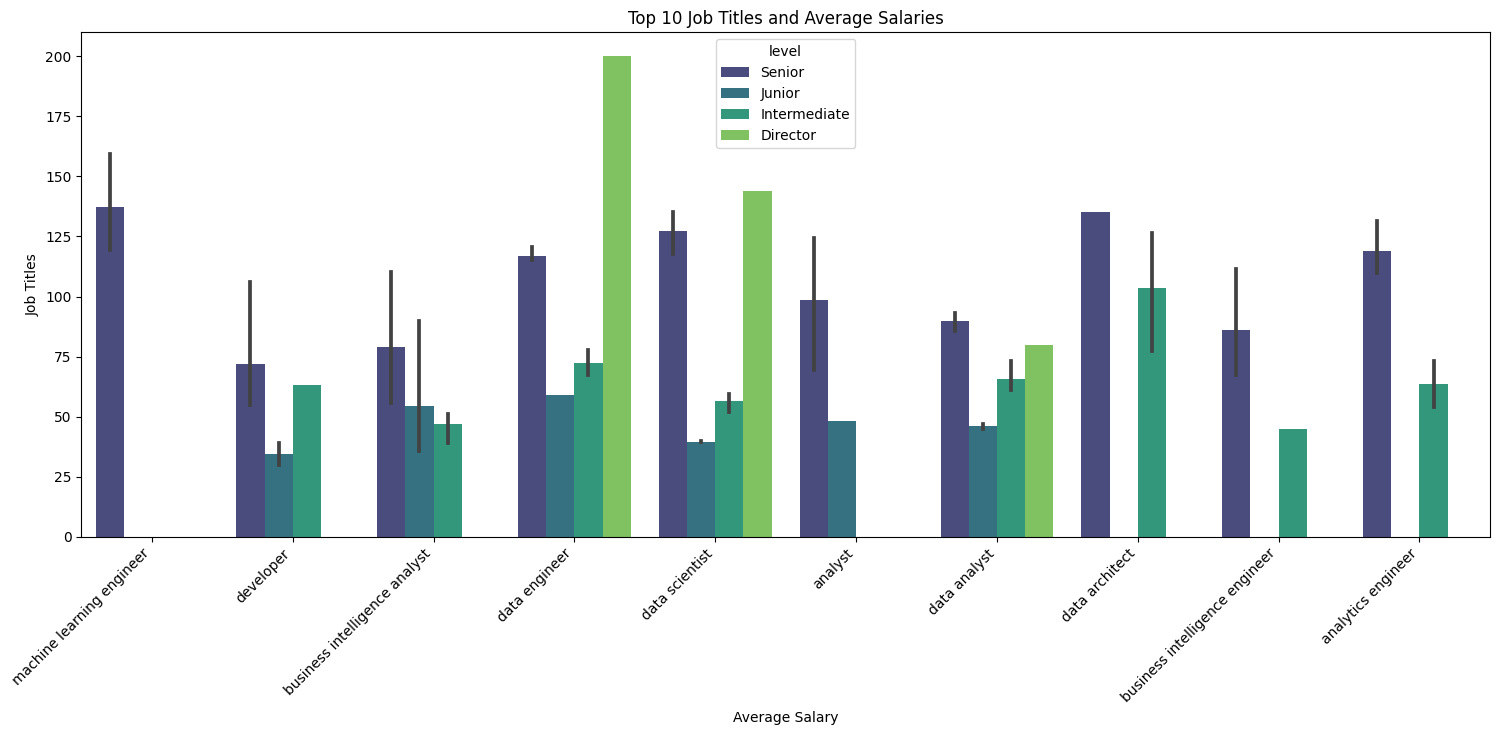

In [366]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Title', y='Salary', hue='level',  data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [367]:
df.to_csv('jobs.csv', index=False)